In [19]:
from solver import Solver
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## PML
Two dimensional scalar wave equation has the following form:
$$ u_{tt} - v^2(u_{xx} + u_{xx}) = f(x, t)$$
The PML for it is:
\begin{equation}
\begin{split}
&u_{tt} + (\sigma_x + \sigma_z)u_{t} + \sigma_x\sigma_z u = v^2(u_{xx} + \phi_x + u_{zz} + \psi_z) + f\\
&\phi_t = -\sigma_x\phi - (\sigma_z - \sigma_x) u_x\\
&\psi_t = -\sigma_z\phi - (\sigma_x - \sigma_z) u_z
\end{split}
\end{equation}

Using central difference for $u_{tt}$ and $u_t$:
$$ \frac{u^{n+1} - 2u^n + u^{n-1}}{dt^2} + (\sigma_x + \sigma_z)\frac{u^{n+1}-u^{n-1}}{2dt} + \sigma_x\sigma_z u = v^2(u^n_{xx} + \phi^n_x + u^n_{zz} + \psi^n_z) + f^n$$
Using a forward difference for $\phi_t$:
$$\frac{\phi^{n+1} - \phi^{n}}{dt} = -\sigma_x \phi^n - (\sigma_z - \sigma_x) u^n_x$$
and using the same for $\psi_t$
$$\frac{\psi^{n+1} - \psi^{n}}{dt} = -\sigma_z \psi^n - (\sigma_x - \sigma_z) u^n_z$$

## Snapshots

In [3]:
## Configuration
h = 0.01
dt = 0.001
nx = nz = 200
v0 = 1.5
nt = 2000
f0 = 10
t0 = 0.1
model = np.ones((nx + 1, nz + 1)) * v0
sources_xz = np.array([
    [100, 100],
])
sol = Solver(model, h, dt, nt, t0, f0, sources_xz)

CFL number is 0.15


In [9]:
## Propagation
save_nt = [300, 600, 900]
sol.step(save_nt=save_nt)
wave = sol.wavefield

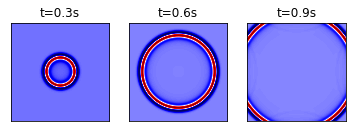

In [23]:
n_snap = len(wave)
# Plot snapshots
fig = plt.figure()
for i in range(n_snap):
    ax = fig.add_subplot(1, n_snap, i+1)
    ax.set_yticks([])
    ax.set_xticks([])
    t = save_nt[i] * dt
    ax.set_title(f't={t:.1f}s')
    ax.imshow(wave[i][0], cmap=matplotlib.cm.seismic)
fig.savefig('./snapshots.png')

## Seismogram

In [5]:
## Configurations 2
sources_xz = np.array([
    [1, 100]
])
rx = np.arange(0, 200)
receivers_xz = np.zeros((200, 2), dtype=int)
receivers_xz[:, 0] = 2
receivers_xz[:, 1] = rx
sol = Solver(model, h, dt, nt, t0, f0, sources_xz, receivers_xz)

CFL number is 0.15


In [6]:
## Propagation
sol.step()

In [7]:
seis = sol.seismogram[0].T

[Text(0, 1, '0.0'),
 Text(40, 1, '0.4'),
 Text(80, 1, '0.8'),
 Text(120, 1, '1.2'),
 Text(160, 1, '1.6'),
 Text(200, 1, '2.0')]

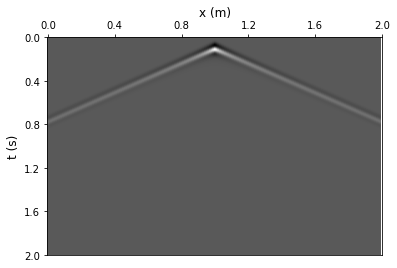

In [8]:
plt.imshow(seis, aspect='auto', cmap='gray')
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('x (m)', fontsize=12)
ax.xaxis.set_label_position('top') 
ax.set_ylabel('t (s)', fontsize=12)
ax.set_yticks(np.arange(0, 2001, 400))
ax.set_yticklabels(np.arange(0, 2001, 400)*dt)
ax.set_xticks(np.arange(0, 201, 40))
ax.set_xticklabels(np.arange(0, 201, 40)*h)
# plt.savefig(f'seis_f0={f0}_h={h}_dt={dt}.png')